# Import libraries

In [3]:
import pandas as pd
import numpy as np
from functions.model import *
from functions.vectorization import *
from functions.vocabulary import *
from functions.labelization import *

# Define train query

In [4]:
train_query="SELECT"

# Import id->label

In [5]:
dict_label_ids = load_dict_label_ids('../../data/train/ids_labels.json')

# Import vectors

In [6]:
path_df_train = '../../data/train/TRAIN_filter.json'
path_new_model = '../../model/my_model_V20.h5'
df_train = pd.read_json(path_df_train, orient='records')
vectorized_dataframe = load_vectorized_dataframe('../../data/train/df_train_vectorized.npy')
df_train.columns = map(str.upper, df_train.columns)
train_ids = df_train['ID_PUESTO_ESCO_ULL']

# Get input dimension of model

In [7]:
vocabulary = load_vocabulary('../../data/train/vocabulary.json')
input_dimension = get_vocabulary_dimension(vocabulary)

# Get output dimension of the model

In [8]:
output_dimension = get_dict_dimension(dict_label_ids)

# Create CNN model

In [9]:
# model = create_rnn(input_dimension, output_dimension)
model = create_cnn(input_dimension, output_dimension)

# Train model

In [10]:
# Convert vectorized dataframe to np.vstack
vector_array = np.vstack(vectorized_dataframe)
train_labels_array = cast_id_to_labels(train_ids, dict_label_ids)

# Train model
model, history = model_train(model, train_query, vector_array, train_labels_array, epochs=10, batch_size=2, validation_split=0.2, verbose=1, balance_data=True)

# Save model
save_model(model, path_new_model)

2023-10-26 13:02:55.422789: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 691763432 exceeds 10% of free system memory.


Epoch 1/10
18946/18955 [============================>.] - ETA: 0s - loss: 2.3648 - accuracy: 0.5682

2023-10-26 13:03:49.681921: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172954544 exceeds 10% of free system memory.


18955/18955 [==============================] - 61s 3ms/step - loss: 2.3640 - accuracy: 0.5683 - val_loss: 1.9283 - val_accuracy: 0.6288
Epoch 2/10
18955/18955 [==============================] - 54s 3ms/step - loss: 1.5271 - accuracy: 0.6765 - val_loss: 1.8890 - val_accuracy: 0.6475
Epoch 3/10
18955/18955 [==============================] - 55s 3ms/step - loss: 1.2740 - accuracy: 0.7162 - val_loss: 1.9717 - val_accuracy: 0.6519
Epoch 4/10
18955/18955 [==============================] - 54s 3ms/step - loss: 1.1271 - accuracy: 0.7437 - val_loss: 2.1075 - val_accuracy: 0.6529


/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot history

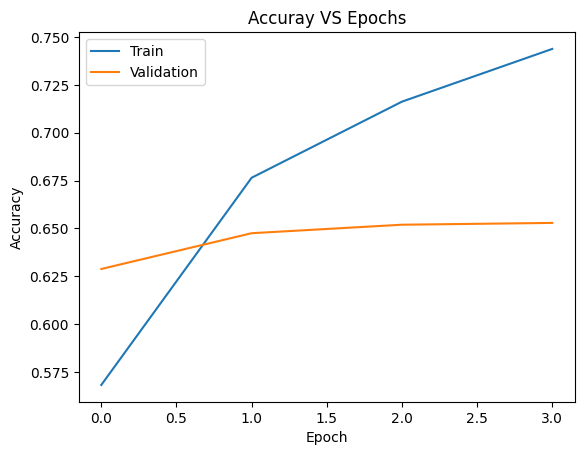

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuray VS Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Resume classificator

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                292032    
                                                                 
 dense_1 (Dense)             (None, 1016)              66040     
                                                                 
Total params: 358072 (1.37 MB)
Trainable params: 358072 (1.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
